In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
tracks = pd.read_csv('spotify-2023.csv', encoding='latin-1')

In [126]:
tracks.head(3)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6


In [127]:
tracks.shape

(953, 24)

In [128]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [129]:
#drop useless columns
tracks.drop(['artist_count','released_day','in_apple_playlists','in_apple_charts','in_deezer_playlists','in_deezer_charts','in_shazam_charts'],axis='columns',inplace=True)
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   released_year         953 non-null    int64 
 3   released_month        953 non-null    int64 
 4   in_spotify_playlists  953 non-null    int64 
 5   in_spotify_charts     953 non-null    int64 
 6   streams               953 non-null    object
 7   bpm                   953 non-null    int64 
 8   key                   858 non-null    object
 9   mode                  953 non-null    object
 10  danceability_%        953 non-null    int64 
 11  valence_%             953 non-null    int64 
 12  energy_%              953 non-null    int64 
 13  acousticness_%        953 non-null    int64 
 14  instrumentalness_%    953 non-null    int64 
 15  liveness_%            953 non-null    in

In [130]:
tracks['key'].value_counts()

C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: key, dtype: int64

In [131]:
key_df = dict(tracks['key'].value_counts())
total = sum(tracks['key'].value_counts().values)
total

858

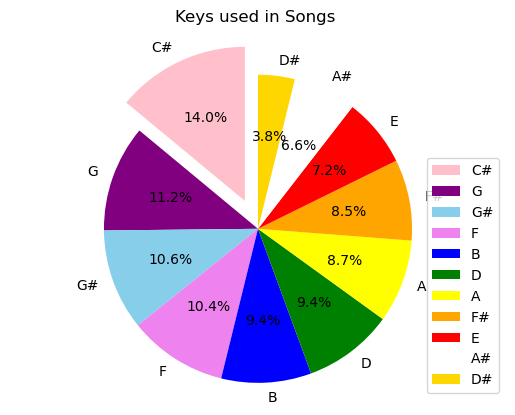

In [161]:
colors = ['pink','purple','skyblue','violet','blue','green','yellow','orange','red','white','gold']
explode = [0.2,0,0,0,0,0,0,0,0,0,0]


plt.pie(list(key_df.values()), labels=key_df.keys(), 
         autopct='%1.1f%%', startangle=90, colors=colors,explode=explode)
plt.title('Keys used in Songs ')
plt.axis('equal') 
plt.legend(labels=key_df.keys(), loc='lower right') 

plt.show()

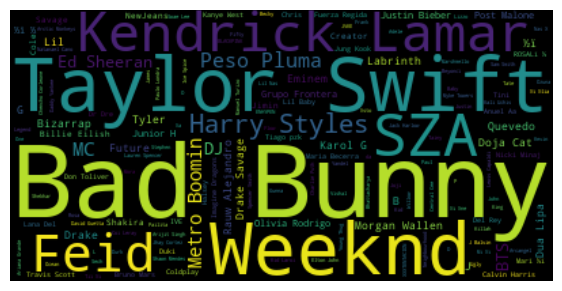

In [133]:
#artists with most number of songs on top 2023

from io import StringIO
si=StringIO()
tracks['artist(s)_name'].apply(lambda x: si.write(str(x)+" "))
s=si.getvalue()
si.close()

from wordcloud import WordCloud
text = s
wordcloud = WordCloud(background_color="black",max_words=len(s),random_state=0,max_font_size=75).generate(text)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Frequency of songs released each month')

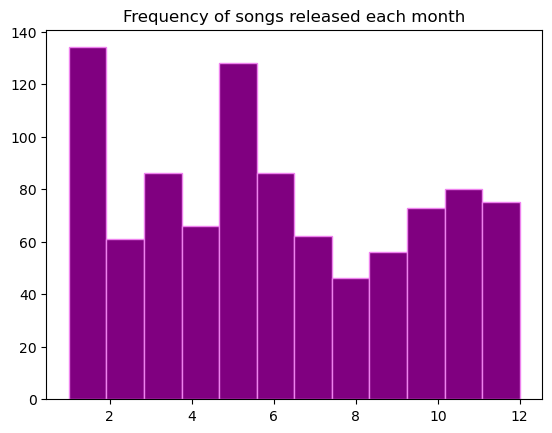

In [134]:
plt.hist(x=tracks['released_month'], bins=12, color='purple',edgecolor='violet')
plt.title("Frequency of songs released each month")

In [135]:
#refine -> convert month from number to names
month_name = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
               7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

tracks['month'] = tracks['released_month'].map(month_name)
sorted_months = tracks.sort_values('released_month', ascending=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

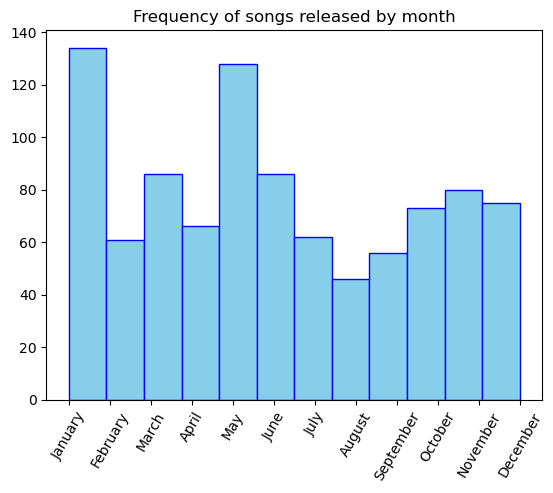

In [136]:
plt.hist(x=sorted_months['month'], bins=12, color='skyblue',edgecolor='blue')
plt.title("Frequency of songs released by month")
plt.xticks(rotation=60)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

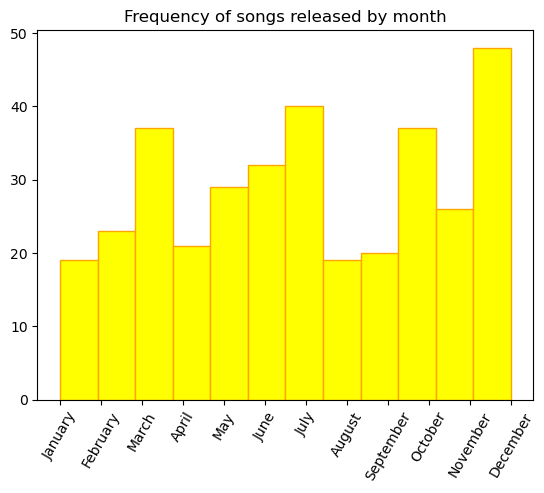

In [137]:
recent = tracks.loc[(tracks['released_year'] == 2023) | (tracks['released_year'] > 2021) & (tracks['released_month'] > 6)]
sorted_months = recent.sort_values('released_month', ascending=True)
plt.hist(x=sorted_months['month'], bins=12, color='yellow',edgecolor='orange')
plt.title("Frequency of songs released by month")
plt.xticks(rotation=60)

In [145]:
#convert streams to millions for better analysis
tracks = tracks.drop(tracks.iloc[[574]].index)
tracks['streams'] = tracks['streams'].astype(dtype='int64')
tracks['streams_in_millions'] = tracks['streams'].apply(lambda x:x/1000000).round(3)

#do the same for recent songs
recent['streams'] = recent['streams'].astype(dtype='int64')
recent['streams_in_millions'] = recent['streams'].apply(lambda x:x/1000000).round(3)

In [146]:
tracks.head(1)

,track_name,artist(s)_name,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,month,streams_in_millions
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,7,553,147,141381703,125,B,Major,80,89,83,31,0,8,4,July,141.382


In [155]:
top = recent.sort_values('streams', ascending=False)
top.head()

,track_name,artist(s)_name,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,month,streams_in_millions
74,"Quevedo: Bzrp Music Sessions, Vol. 52","Bizarrap, Quevedo",2022,7,8506,45,1356565093,128,D,Major,62,55,78,1,3,23,4,July,1356.565
12,Flowers,Miley Cyrus,2023,1,12211,115,1316855716,118,NaN,Major,71,65,68,6,0,3,7,January,1316.856
77,Unholy (feat. Kim Petras),"Sam Smith, Kim Petras",2022,9,8576,42,1230675890,131,D,Major,71,24,47,1,0,27,9,September,1230.676
15,Kill Bill,SZA,2022,12,8109,77,1163093654,89,G#,Major,64,43,73,5,17,16,4,December,1163.094
42,I'm Good (Blue),"Bebe Rexha, David Guetta",2022,8,12482,80,1109433169,128,G,Minor,56,38,97,4,0,35,4,August,1109.433


In [148]:
import plotly.express as px

In [156]:
top_20_songs = px.bar(top.head(20), x = 'streams_in_millions', y= 'track_name', 
                      color = 'streams_in_millions', title = 'Top 20 Songs By Number Of Streams' , 
                      labels = {'track_name' : 'Song Name', 'streams_in_millions' : 'Stream In Millions'})
top_20_songs

In [164]:
# grouping by artist name
top_artists = top.groupby(['artist(s)_name'])['streams_in_millions'].sum().sort_values(ascending =False).to_frame().head(20)
top_artists.reset_index(inplace = True)

top_20_artists = px.bar(top_artists ,  x = 'streams_in_millions', y= 'artist(s)_name',
                                    color = 'streams_in_millions', title = 'Top 20 Artists By Number of Streams',
                          labels = {'artist(s)_name': 'Artist Name', 'streams_in_millions': 'Number Of Streams (in Millions)'})
top_20_artists

In [189]:
playlist = px.scatter(recent, x = 'in_spotify_playlists', y= 'streams_in_millions', 
                      color = 'streams_in_millions',title = 'Playlisting vs Streams ',
                      labels = {'in_spotify_playlists': 'Number of Spotify Playlists The Song Is In', 'streams_in_millions': 'Number Of Streams In Millions'})
playlist

In [190]:
charts = px.scatter(recent, x = 'in_spotify_charts', y= 'streams_in_millions', 
                      color = 'streams_in_millions',title = 'Charting vs Streams',
                      labels = {'in_spotify_charts': 'Number of Spotify Charts The Song Is In', 'streams_in_millions': 'Number Of Streams In Millions'})
charts

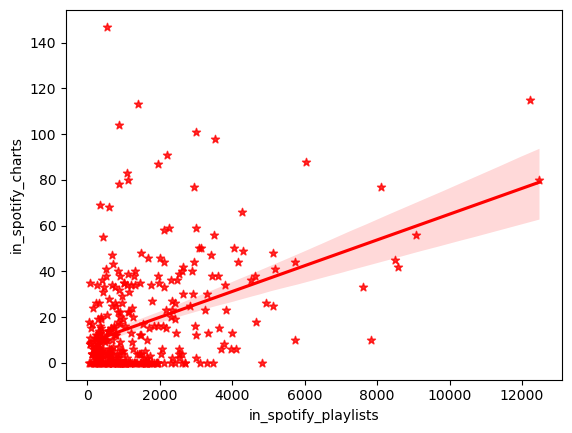

In [188]:
ax = sns.regplot(x = 'in_spotify_playlists', y = 'in_spotify_charts', data=recent, color='red',marker='*')

In [202]:
streams = px.box(recent, y="streams_in_millions")
streams.show()

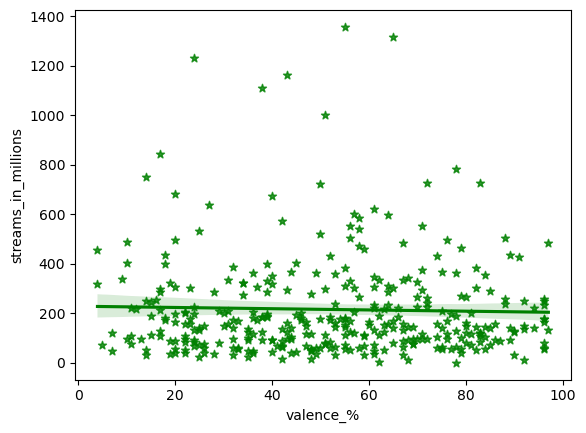

In [204]:
ax = sns.regplot(x = 'valence_%', y = 'streams_in_millions', data=recent, color='green',marker='*')

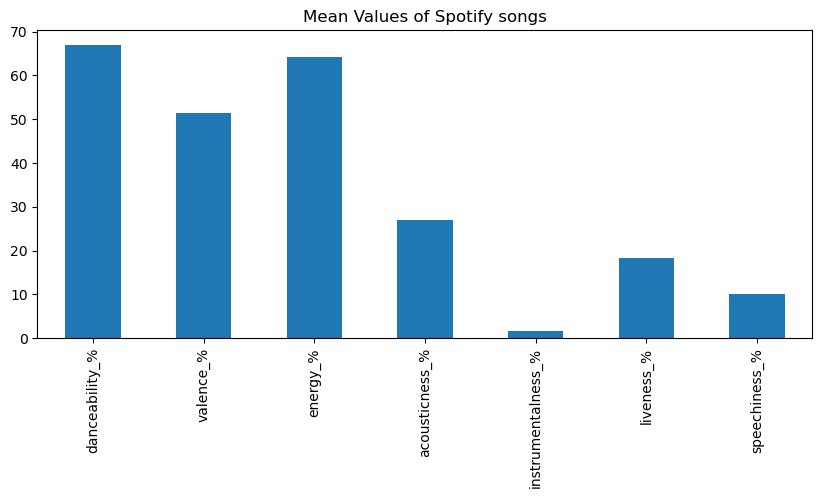

In [211]:
features = tracks[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%' ,  'liveness_%', 'speechiness_%']]
plt.figure(figsize=(10,4))
means = features.mean().plot.bar()
plt.title('Mean Values of Spotify songs')
plt.show()

[Text(0.5, 0, 'bpm'),
 Text(1.5, 0, 'danceability_%'),
 Text(2.5, 0, 'valence_%'),
 Text(3.5, 0, 'energy_%'),
 Text(4.5, 0, 'acousticness_%'),
 Text(5.5, 0, 'instrumentalness_%'),
 Text(6.5, 0, 'liveness_%'),
 Text(7.5, 0, 'speechiness_%')]

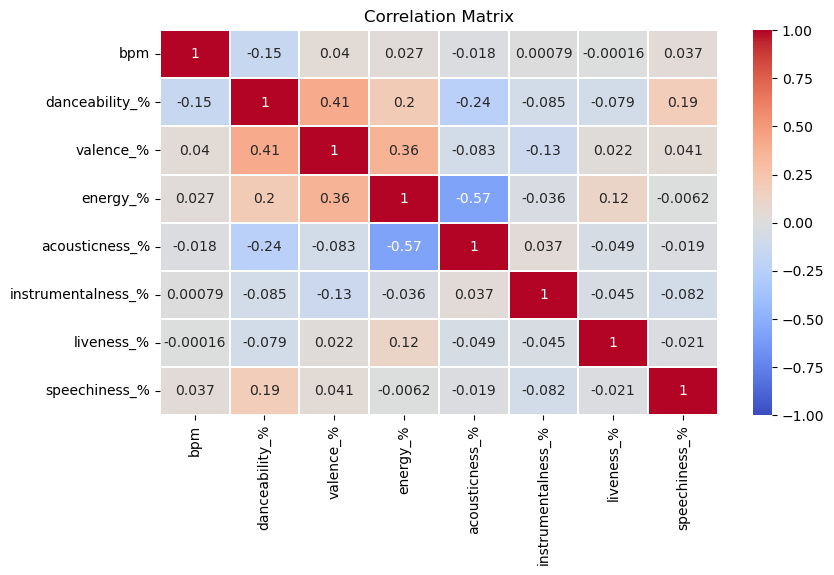

In [218]:
matrix = tracks[['bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%' ,  'liveness_%', 'speechiness_%']].corr(method='pearson')
plt.figure(figsize=(9,5))
corrmat = sns.heatmap(matrix, annot = True, vmin=-1, vmax=1, center=0,
                   cmap='coolwarm', linewidths=0.1, linecolor='white')
corrmat.set_title('Correlation Matrix')
corrmat.set_xticklabels(hmap.get_xticklabels(), rotation=90)

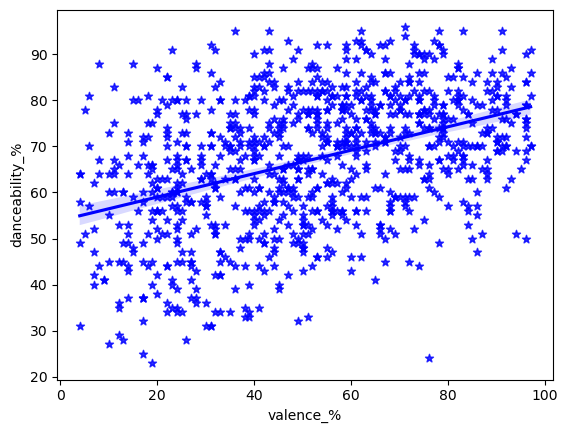

In [229]:
#most correlated parameters
ax = sns.regplot(x = 'valence_%', y = 'danceability_%', data=tracks, color='blue',marker='*')

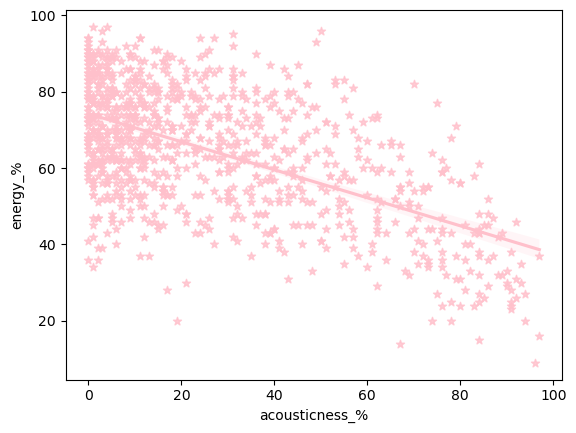

In [225]:
#least correlated parameters
ax = sns.regplot(x = 'acousticness_%', y = 'energy_%', data=tracks, color='pink',marker='*')

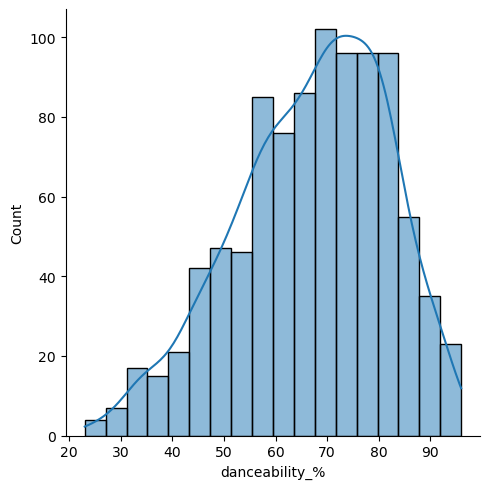

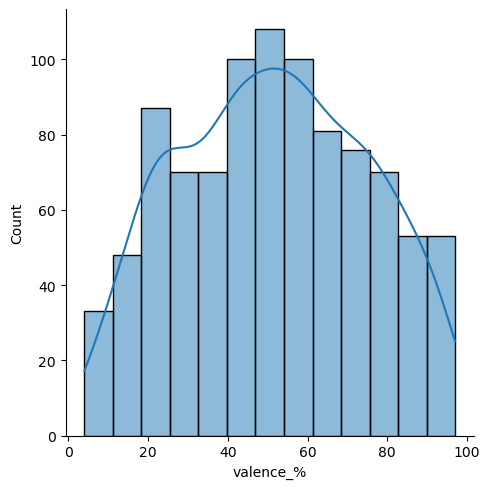

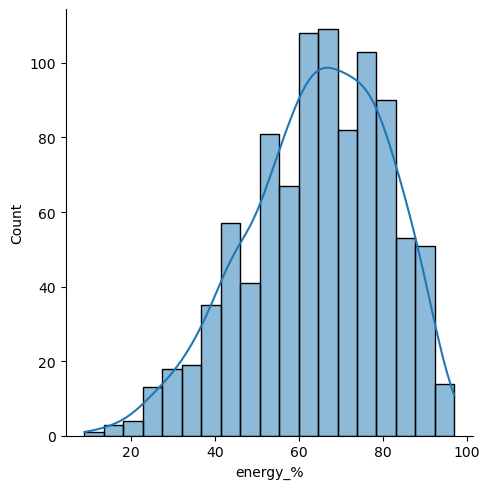

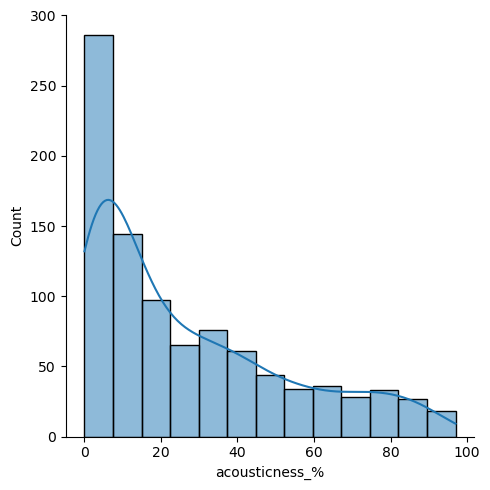

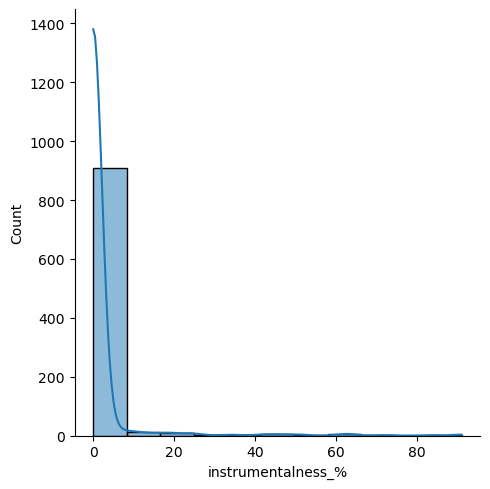

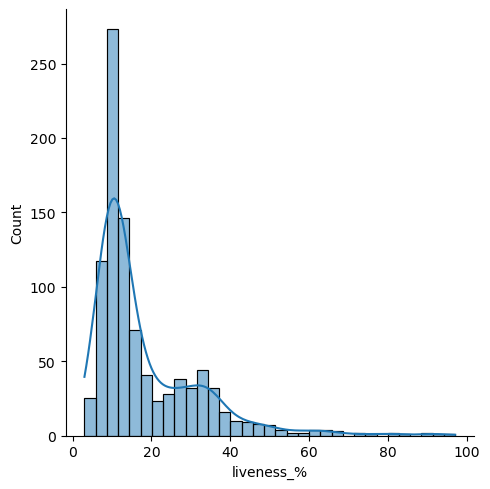

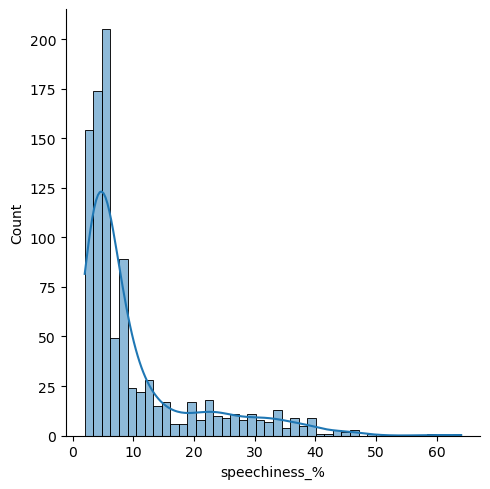

In [230]:
# fetching a list of song features
features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%' ,  'liveness_%', 'speechiness_%']

# plotting histogram for each feature
for col in features:
  sns.displot(tracks, x=col, kde=True)
  plt.show()

In [231]:
old_hits = tracks.loc[(tracks['released_year'] < 2021) | (tracks['released_year'] == 2022) & (tracks['released_month'] <= 6)]